# In this assignment we learn about numerical stabiity of the covariance matrix, fitting $\chi^2$ distributions, to correct for the Hartlap factor.

## For this assignment no external packages are required. You just need a running conda environment, where numpy and matplotlib are installed.

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy.linalg import inv
from scipy.special import gamma, factorial
from scipy.optimize import curve_fit
from scipy.stats import chi2 as chi2_scp
#import scipy
import seaborn as sns

## Preparation: load in the data we need for this assignment.

In [2]:
model=np.load('data_4_assignment1/reference_model.npy') # This will be our reference model
cov=np.load('data_4_assignment1/covariance.npy') # This is the analytical covariance matrix, which we assume is the true covariance of the data

In [3]:
np.shape(cov)

(900, 900)

## Task 1: Create two sets of 10000 noisy Gaussian data vectors each using the provided reference model and true covariance matrix. 

In [4]:
noisy_data_set1=np.random.multivariate_normal(model, cov, size=10000)
noisy_data_set2 = np.random.multivariate_normal(model, cov, size=10000)

In [5]:
noisy_data_set1.shape

(10000, 900)

Text(0.5, 1.0, 'True model and 10 noisy data vectors')

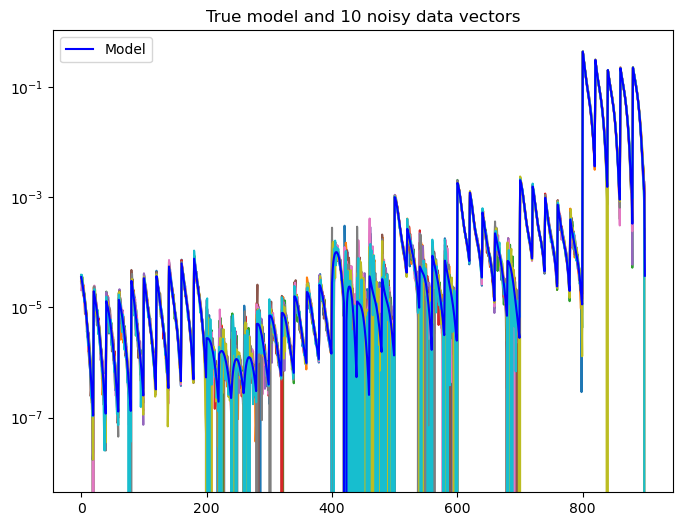

In [6]:
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(noisy_data_set1[i,:])
    plt.yscale('log')

plt.plot(model, color ="b",label="Model")
plt.legend()
plt.title("True model and 10 noisy data vectors")

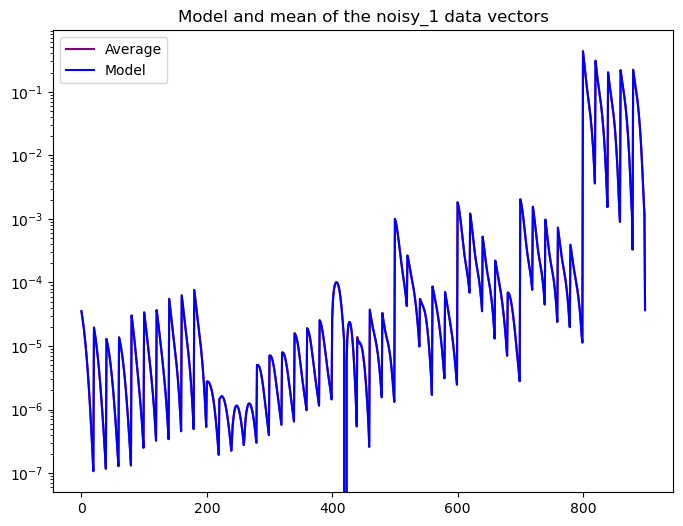

In [7]:
# check that the noisy data vector scatter around the truth
#the average of the 10000 noisy data vectors actually coincides with the model 
plt.figure(figsize=(8,6))
noisy_mean_1 = np.mean(noisy_data_set1, axis=0)
plt.plot(noisy_mean_1, label="Average", color="purple")
plt.plot(model, label="Model", color="blue")
plt.yscale("log")
plt.title("Model and mean of the noisy_1 data vectors")
plt.legend()

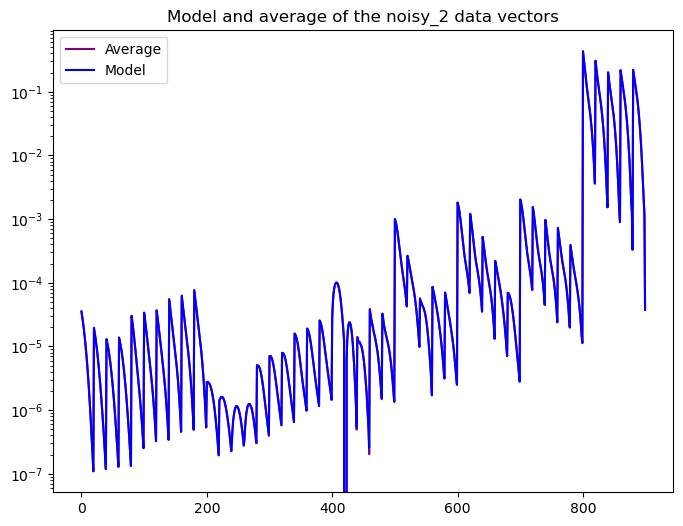

In [8]:
# check that the noisy data vector scatter around the truth
plt.figure(figsize=(8,6))
noisy_mean_2 = np.mean(noisy_data_set2, axis=0)
plt.plot(noisy_mean_2, label="Average", color="purple")
plt.plot(model, label="Model", color="blue")
plt.yscale("log")
plt.title("Model and average of the noisy_2 data vectors")
plt.legend()

Text(0.5, 1.0, 'Residuals for noisy_1')

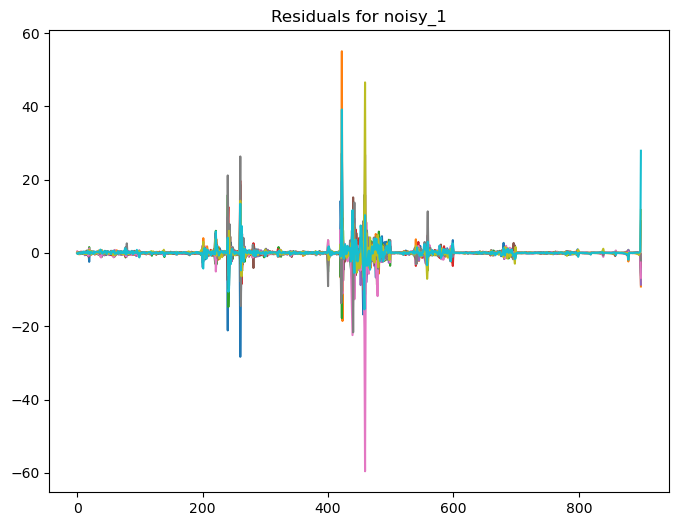

In [9]:
#Plotting residuals
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot((model-noisy_data_set1[i])/model)
plt.title("Residuals for noisy_1")

Text(0.5, 1.0, 'Residuals for noisy_2')

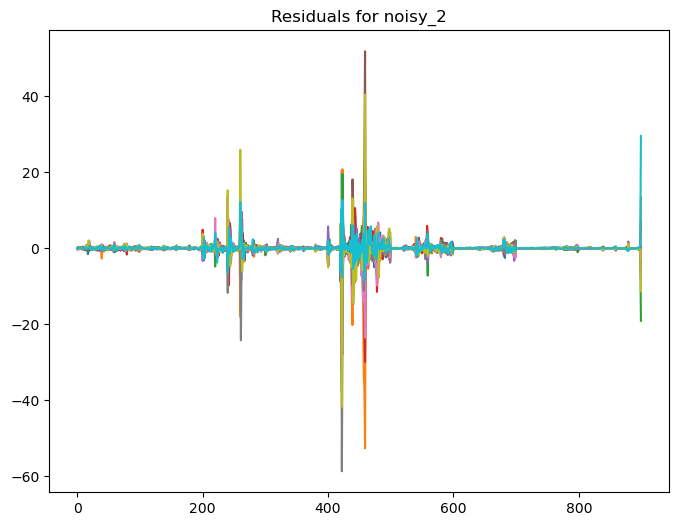

In [10]:
#Plotting residuals
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot((model-noisy_data_set2[i])/model)
plt.title("Residuals for noisy_2")

Amazing, multivariate_normal actually makes Gaussian distributions :)


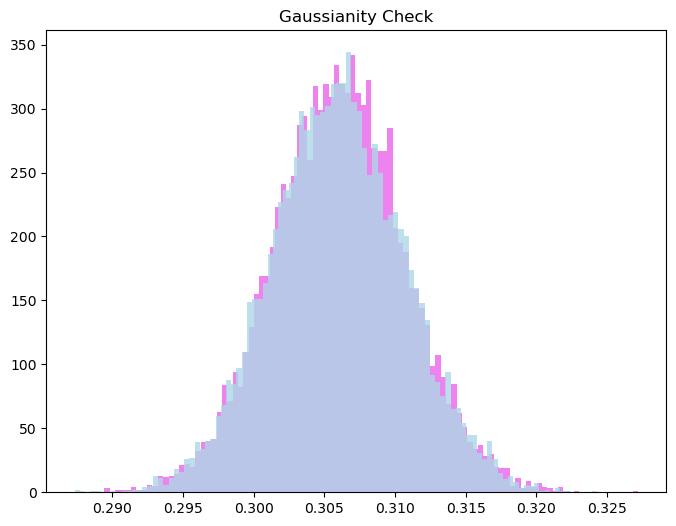

In [12]:
plt.figure(figsize=(8,6))
plt.hist(noisy_data_set1[:,820], bins=100, color="violet")
plt.hist(noisy_data_set2[:,820], bins=100, color="lightblue", alpha=0.8)
plt.title("Gaussianity Check")
print("Amazing, multivariate_normal actually makes Gaussian distributions :)")

## Task 2: 
#### Use the provided covariance matrix and the model as a reference.
### 2.1: Test if set 1 follows a $\chi^2$ distribution with the correct degrees of freedom, by measuring its mean and variance. 
### 2.2: Convince yourself, that the measured $\chi^2$ follows a $\chi^2$ distribution.

Noisy dataset 1
Mean: 899.9184740289796
Standard deviation: 1765.6340439316793
Noisy dataset 2
Mean: 900.3517735853358
Standard deviation: 1786.1247362843637


Text(0.5, 1.0, '$\\chi^2$ distributions fit')

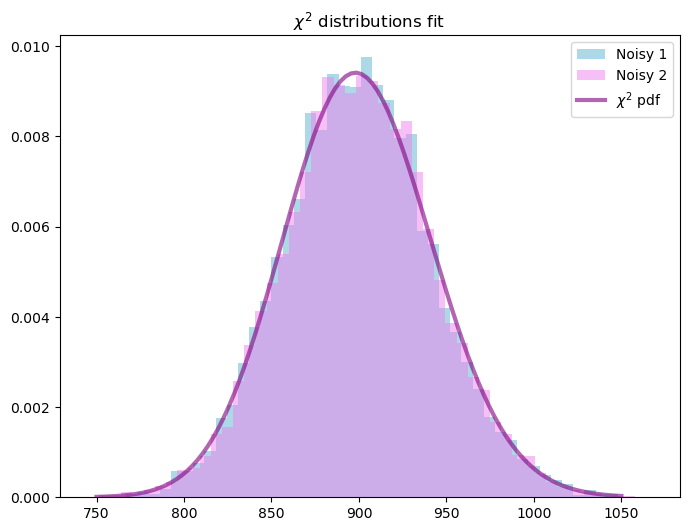

In [13]:
plt.figure(figsize=(8,6))
inv_cov = inv(cov)

# Noisy data 1
chi2 = []

for i in range(10000):
    chi2.append((model-noisy_data_set1[i,:])@inv_cov@(model-noisy_data_set1[i,:]).T)

plt.hist(chi2, bins=50, color="lightblue",density=True,label="Noisy 1")
print("Noisy dataset 1")
print(rf"Mean: {np.mean(chi2)}" )
print(rf"Standard deviation: {np.var(chi2)}" )


#Noisy dataset 2
chi2_bis = []

for i in range(10000):
    chi2_bis.append((model-noisy_data_set2[i,:])@inv_cov@(model-noisy_data_set2[i,:]).T)

plt.hist(chi2_bis, bins=50, color="violet", alpha=0.5,density=True,label="Noisy 2")
print("Noisy dataset 2")
print(rf"Mean: {np.mean(chi2_bis)}" )
print(rf"Standard deviation: {np.var(chi2_bis)}" )


# Fit Histrogram with an actual chi2 distribution
x = np.linspace(750, 1050, 100)
plt.plot(x, chi2_scp.pdf(x, 900), lw=3, alpha=0.6, label=r'$\chi^2$ pdf', color="purple")
plt.legend()
plt.title(r"$\chi^2$ distributions fit")

For the chi square distribution, the expected value for the mean is the number of degrees of freedom and the
expected value for the variance is 2*number of degrees of freedom. This is approximately what i find for the two distributions, considering that we have 900 DoF. The fit with the analytical $\chi^2$ distribution also suggests that everything is correct and that the data are actually distributed as a $\chi^2$.

### After convincing us that the two sets actually follow a $\chi^2$ distribution, if we use the analytical covariance matrix, we want to check if that is also true if we measure the covariance matrix from simulations. 
### As running simulations is too expensive, we simulate measurements from simulations with the created set 2. 
### Task 3: As a preparation, please measure the numerical covariance matrix from [500,1000,5000,10000] data vectors from set 2. What do you observe in the correlation matrix? Are the covariances positive semi-definite?

In [14]:
#Calculating the covariances from dataset 2
cov_num500 = np.cov(noisy_data_set2[:500,:], rowvar=False)
cov_num1000 = np.cov(noisy_data_set2[:1000,:], rowvar=False)
cov_num5000 = np.cov(noisy_data_set2[:5000,:], rowvar=False)
cov_num10000 = np.cov(noisy_data_set2, rowvar=False)

<Figure size 640x480 with 0 Axes>

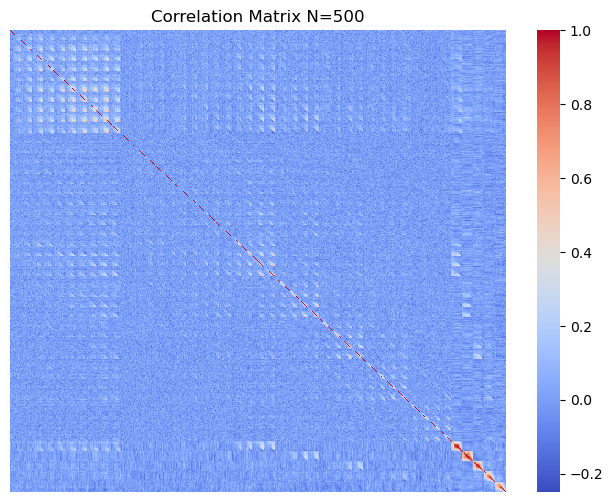

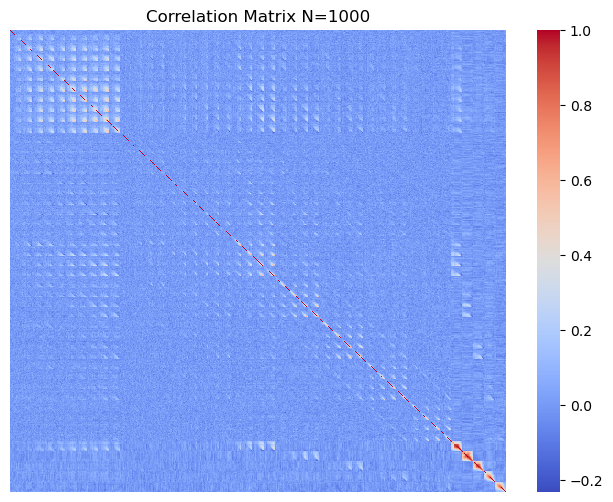

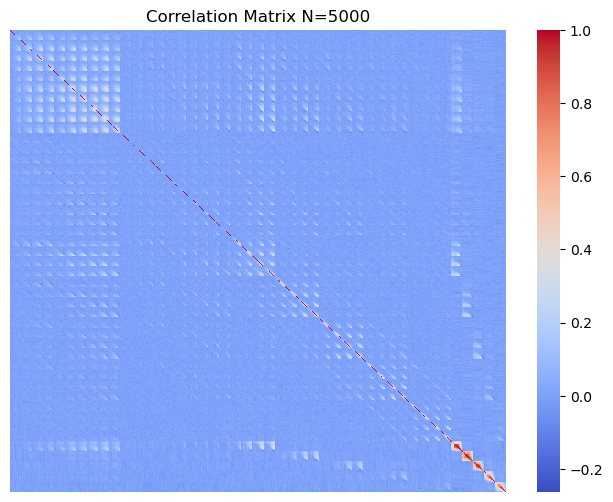

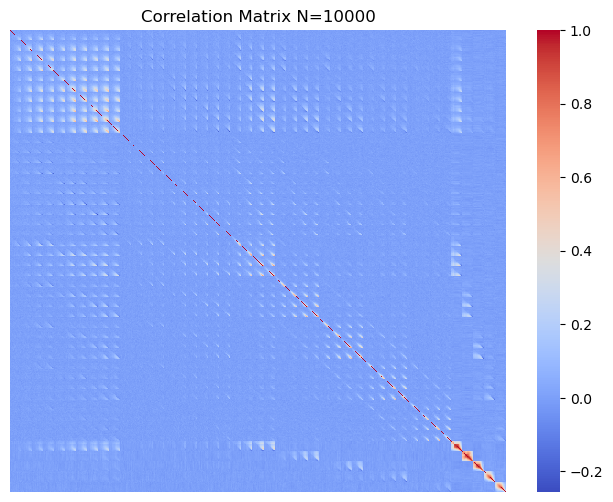

In [15]:
def plot_correlation_matrix(cov_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cov_matrix / np.outer(np.sqrt(np.diag(cov_matrix)), np.sqrt(np.diag(cov_matrix))),
                annot=False, cbar=True, cmap="coolwarm", xticklabels=[], yticklabels=[])
    plt.title(title)

cov_matrices = [cov_num500, cov_num1000, cov_num5000, cov_num10000]
titles = ["Correlation Matrix N=500", "Correlation Matrix N=1000", "Correlation Matrix N=5000", "Correlation Matrix N=10000"]

for i, (cov_matrix, title) in enumerate(zip(cov_matrices, titles)):
    plt.figure(i)
    plot_correlation_matrix(cov_matrix, title)

plt.show()

The correlation matrices are behaving as expected: they are symmetric and with ones along the diagonal. As the number of realizations increases, the matrix becomes less and less noisy.

In [15]:
print("Are those covariances positive semidefinite?")
print( "Matrix with 500 realizations: " + str(np.all(np.linalg.eigvals(cov_num500) > 0)))
print( "Matrix with 1000 realizations: " + str(np.all(np.linalg.eigvals(cov_num1000) > 0)))
print( "Matrix with 5000 realizations: " + str(np.all(np.linalg.eigvals(cov_num5000) > 0)))
print( "Matrix with 10000 realizations: " + str(np.all(np.linalg.eigvals(cov_num10000) > 0)))

Are those covariances positive semidefinite?
Matrix with 500 realizations: False
Matrix with 1000 realizations: True
Matrix with 5000 realizations: True
Matrix with 10000 realizations: True


As expected, the covariance matrix built with 500 simulations is not positive semi-definite. This is happening because N=500 < 900 (points in the data vector). On the other hand, the other three matrices are positive semi-definite as they should be.

### Task 4: Test for all four covariance matrices if you recover a $\chi^2$ distribution with the mean and variance. What do you observe? 

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

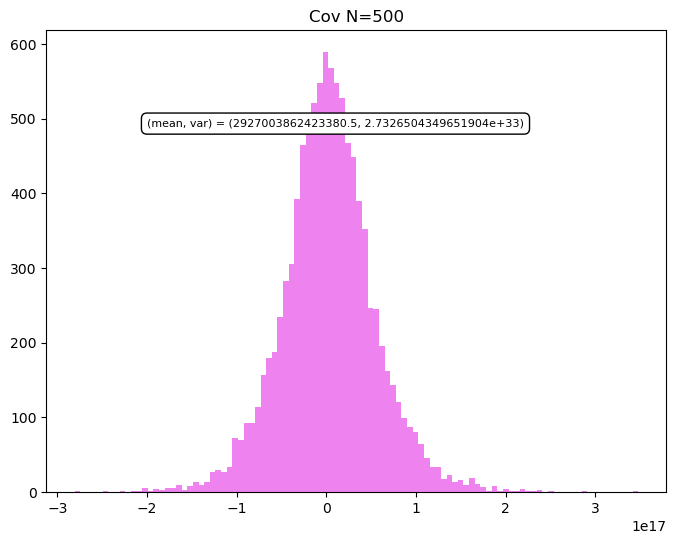

<Figure size 800x600 with 0 Axes>

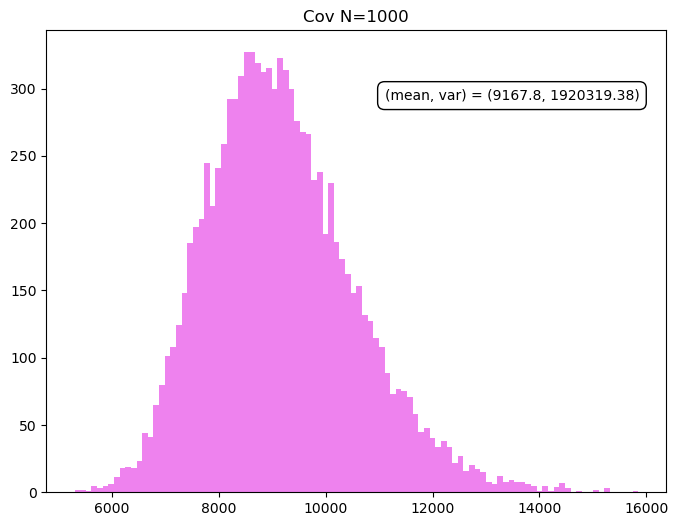

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

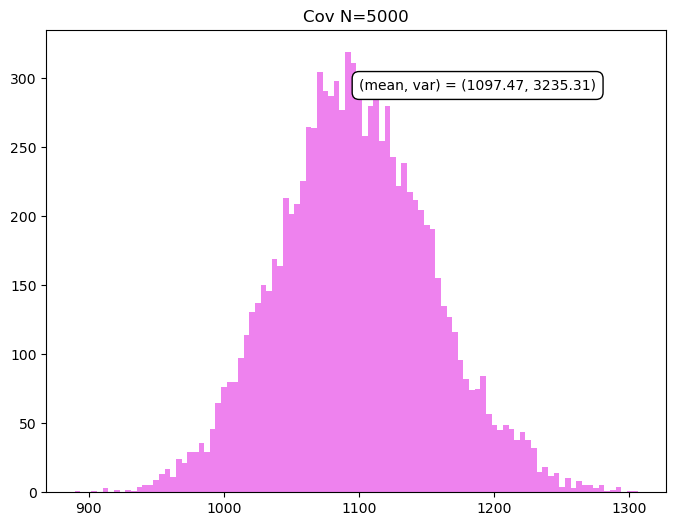

<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

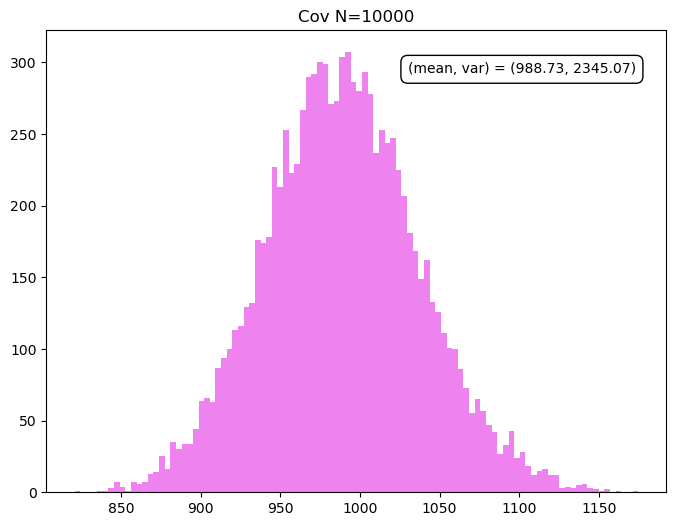

In [23]:
plt.figure(figsize=(8, 6))
plt.figure(0)
plt.figure(figsize=(8, 6))
inv_cov = inv(cov_num500) 
chi2 = []
for i in range(10000):
    chi2.append((model - noisy_data_set1[i, :]) @ inv_cov @ (model - noisy_data_set1[i, :]).T)

plt.hist(chi2, bins=100, color="violet")
plt.title("Cov N=500")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(-2e17, 500, text, fontsize=8, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

plt.figure(figsize=(8, 6))
plt.figure(1)
plt.figure(figsize=(8, 6))
inv_cov = inv(cov_num1000)
chi2 = []
for i in range(10000):
    chi2.append((model - noisy_data_set1[i, :]) @ inv_cov @ (model - noisy_data_set1[i, :]).T)

plt.hist(chi2, bins=100, color="violet")
plt.title("Cov N=1000")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(11100, 300, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

plt.figure(figsize=(8, 6))
plt.figure(2)
plt.figure(figsize=(8, 6))
inv_cov = inv(cov_num5000)
chi2 = []
for i in range(10000):
    chi2.append((model - noisy_data_set1[i, :]) @ inv_cov @ (model - noisy_data_set1[i, :]).T)

plt.hist(chi2, bins=100, color="violet")
plt.title("Cov N=5000")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(1100, 300, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

plt.figure(figsize=(8, 6))
plt.figure(3)
plt.figure(figsize=(8, 6))
inv_cov = inv(cov_num10000)
chi2 = []
for i in range(10000):
    chi2.append((model - noisy_data_set1[i, :]) @ inv_cov @ (model - noisy_data_set1[i, :]).T)

plt.hist(chi2, bins=100, color="violet")
plt.title("Cov N=10000")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(1030, 300, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

We only recover a $\chi^2$ distribution with the N=10000 covariance matrix. That is to be expected beacuse this is the only reliable covariance matrix (N=10000 >> n=900). In the other cases I don't find $\chi^2$ distributions, in fact the mean and variance are very off.

### Task 5: Repeat the same exercise from before, but debias your inverse covriance matrix with the so-called Hartlap factor. What do you observe?

Hartlap factor for n_r=500: -0.8056112224448898


<Figure size 640x480 with 0 Axes>

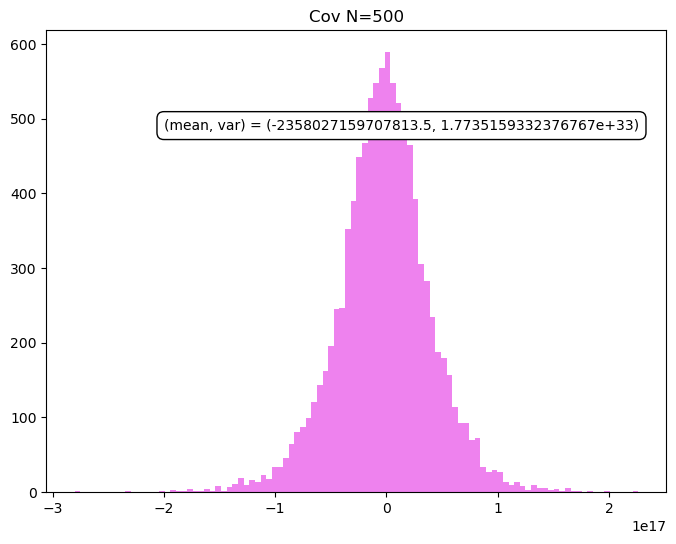

Hartlap factor for n_r=1000: 0.0980980980980981


<Figure size 640x480 with 0 Axes>

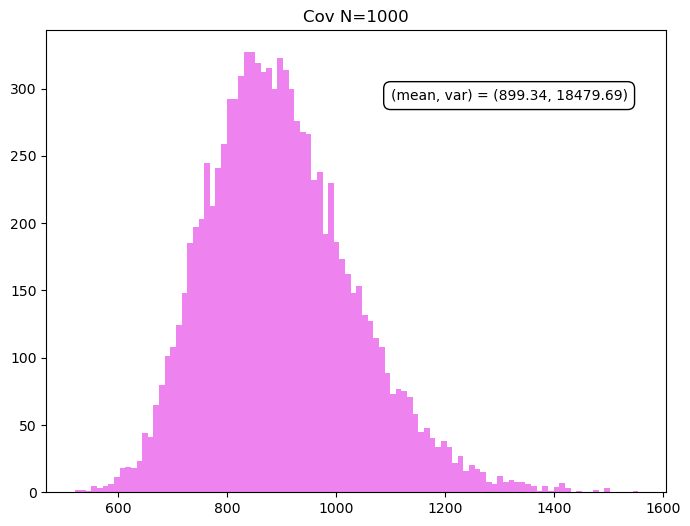

Hartlap factor for n_r=5000: 0.8197639527905581


<Figure size 640x480 with 0 Axes>

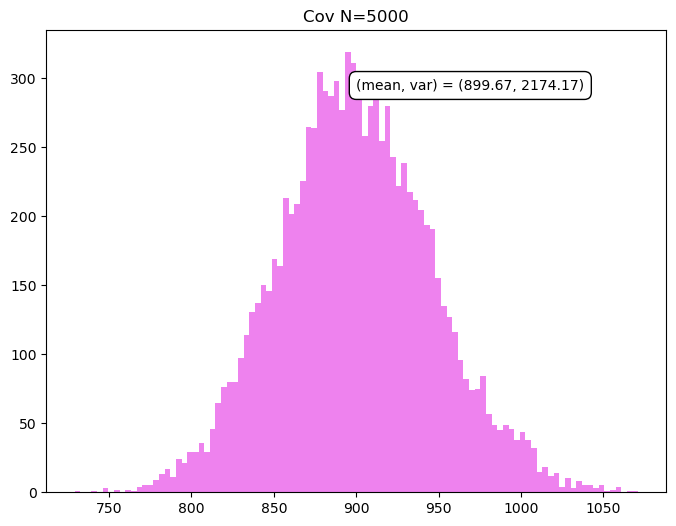

Hartlap factor for n_r=10000: 0.9098909890989099


<Figure size 640x480 with 0 Axes>

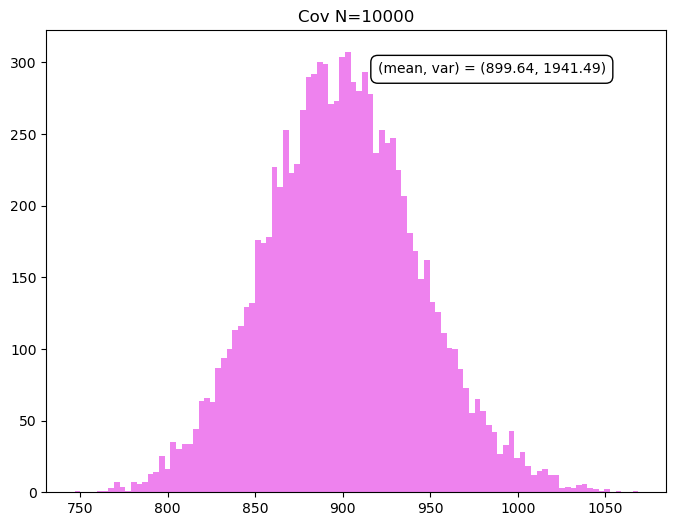

In [27]:
n_r = 500
n_d = 900
h = (n_r-n_d-2)/(n_r-1)
print(f"Hartlap factor for n_r=500: {h}")
inv_cov = inv(cov_num500)*h


plt.figure(0)
plt.figure(figsize=(8, 6))
chi2 = []
for i in range(10000):
    chi2.append((model - noisy_data_set1[i, :]) @ inv_cov @ (model - noisy_data_set1[i, :]).T)

plt.hist(chi2, bins=100, color="violet")
plt.title("Cov N=500")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(-2e17, 500, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

n_r = 1000
n_d = 900
h = (n_r-n_d-2)/(n_r-1)
print(f"Hartlap factor for n_r=1000: {h}")
inv_cov = inv(cov_num1000)*h


plt.figure(1)
plt.figure(figsize=(8, 6))
chi2 = []
for i in range(10000):
    chi2.append((model - noisy_data_set1[i, :]) @ inv_cov @ (model - noisy_data_set1[i, :]).T)

plt.hist(chi2, bins=100, color="violet")
plt.title("Cov N=1000")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(1100, 300, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()


n_r = 5000
n_d = 900
h = (n_r-n_d-2)/(n_r-1)
print(f"Hartlap factor for n_r=5000: {h}")
inv_cov = inv(cov_num5000)*h


plt.figure(2)
plt.figure(figsize=(8, 6))
chi2 = []
for i in range(10000):
    chi2.append((model - noisy_data_set1[i, :]) @ inv_cov @ (model - noisy_data_set1[i, :]).T)

plt.hist(chi2, bins=100, color="violet")
plt.title("Cov N=5000")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(900, 300, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()


n_r = 10000
n_d = 900
h = (n_r-n_d-2)/(n_r-1)
print(f"Hartlap factor for n_r=10000: {h}")
inv_cov = inv(cov_num10000)*h

plt.figure(3)
plt.figure(figsize=(8, 6))
chi2 = []
for i in range(10000):
    chi2.append((model - noisy_data_set1[i, :]) @ inv_cov @ (model - noisy_data_set1[i, :]).T)

plt.hist(chi2, bins=100, color="violet",)
plt.title("Cov N=10000")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(920, 300, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()


The hartlap correction factor is meaningful only in the last case, where the distribution is actually a $\chi^2$. In this case the mean and variance actually get closer to the expected values. 

### Task 6: Repeat task 5 again, but this time, test if set 2 also follows a $\chi^2$ distribution. What do you observe?

Hartlap factor for n_r=500: -0.8056112224448898


<Figure size 640x480 with 0 Axes>

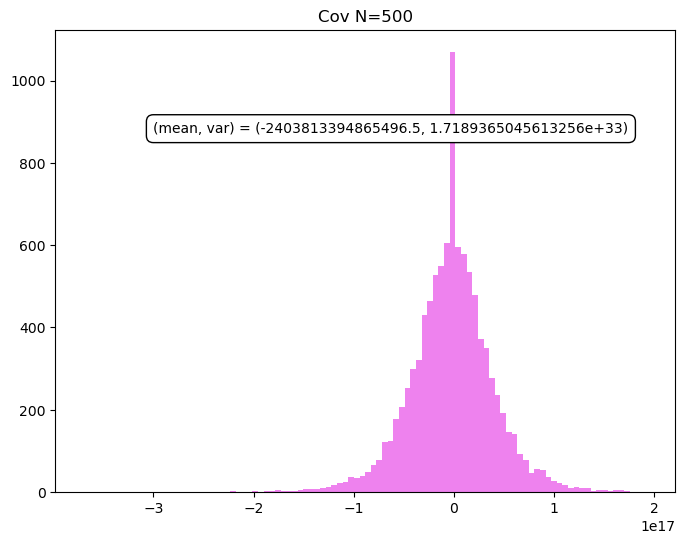

Hartlap factor for n_r=1000: 0.0980980980980981


<Figure size 640x480 with 0 Axes>

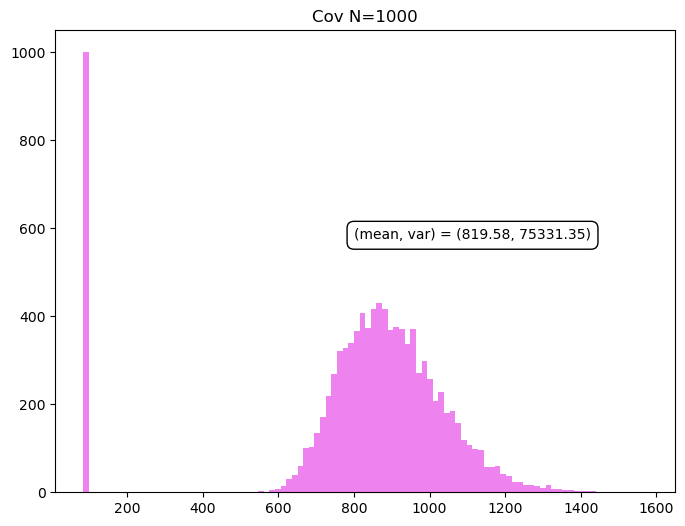

Hartlap factor for n_r=5000: 0.8197639527905581


<Figure size 640x480 with 0 Axes>

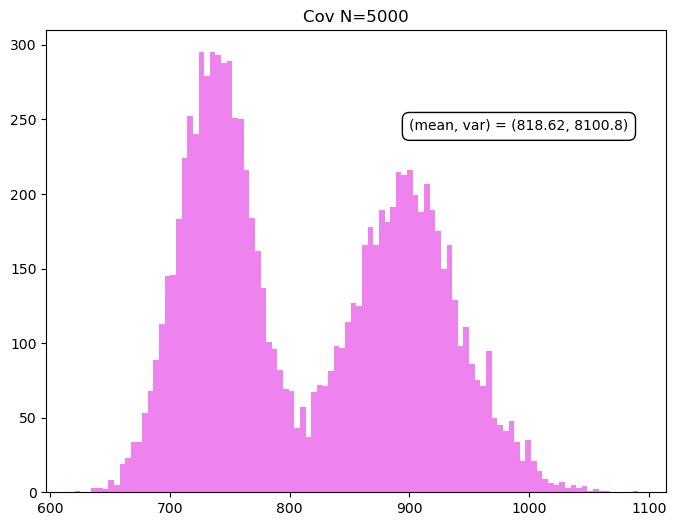

Hartlap factor for n_r=10000: 0.9098909890989099


<Figure size 640x480 with 0 Axes>

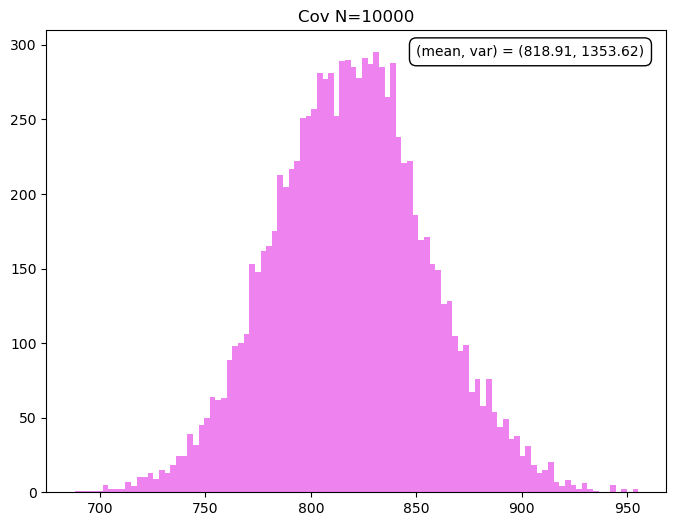

In [29]:
n_r = 500
n_d = 900
h = (n_r-n_d-2)/(n_r-1)
print(f"Hartlap factor for n_r=500: {h}")
inv_cov = inv(cov_num500)*h


plt.figure(0)
plt.figure(figsize=(8, 6))
chi2 = []
for i in range(10000):
    chi2.append((model - noisy_data_set2[i, :]) @ inv_cov @ (model - noisy_data_set2[i, :]).T)

plt.hist(chi2, bins=100, color="violet")
plt.title("Cov N=500")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(-3e17, 900, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

n_r = 1000
n_d = 900
h = (n_r-n_d-2)/(n_r-1)
print(f"Hartlap factor for n_r=1000: {h}")
inv_cov = inv(cov_num1000)*h


plt.figure(1)
plt.figure(figsize=(8, 6))
chi2 = []
for i in range(10000):
    chi2.append((model - noisy_data_set2[i, :]) @ inv_cov @ (model - noisy_data_set2[i, :]).T)

plt.hist(chi2, bins=100, color="violet")
plt.title("Cov N=1000")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(800, 600, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

n_r = 5000
n_d = 900
h = (n_r-n_d-2)/(n_r-1)
print(f"Hartlap factor for n_r=5000: {h}")
inv_cov = inv(cov_num5000)*h


plt.figure(2)
plt.figure(figsize=(8, 6))
chi2 = []
for i in range(10000):
    chi2.append((model - noisy_data_set2[i, :]) @ inv_cov @ (model - noisy_data_set2[i, :]).T)

plt.hist(chi2, bins=100, color="violet")
plt.title("Cov N=5000")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(900, 250, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

n_r = 10000
n_d = 900
h = (n_r-n_d-2)/(n_r-1)
print(f"Hartlap factor for n_r=10000: {h}")
inv_cov = inv(cov_num10000)*h

plt.figure(3)
plt.figure(figsize=(8, 6))
chi2 = []
for i in range(10000):
    chi2.append((model - noisy_data_set2[i, :]) @ inv_cov @ (model - noisy_data_set2[i, :]).T)

plt.hist(chi2, bins=100, color="violet")
plt.title("Cov N=10000")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(850, 300, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()


In this case the distributions are off. That's beacuse we are using the same data for the covariance matrix and the $\chi^2$ distribution. In the next cell I will plot the same histograms, but using the subset of data not employed in the covariance matrix construction: the histograms should be more well-behaved. I cannot do that in the last case because i'm using the full dataset for the covariance matrix.

Hartlap factor for n_r=500: -0.8056112224448898


<Figure size 640x480 with 0 Axes>

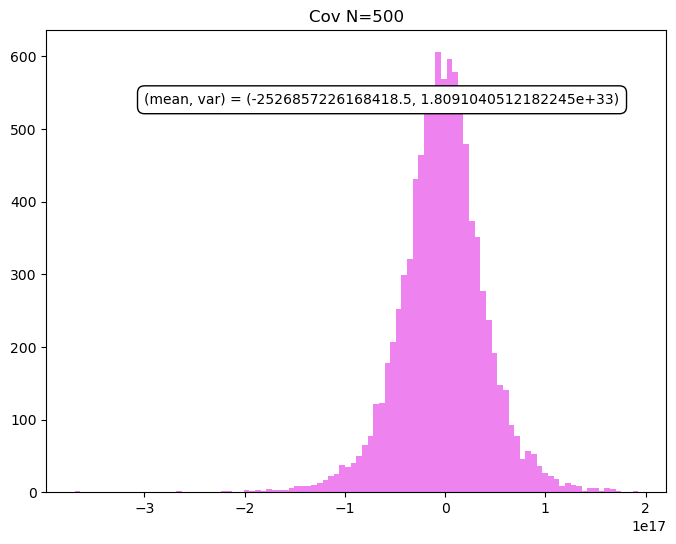

Hartlap factor for n_r=1000: 0.0980980980980981


<Figure size 640x480 with 0 Axes>

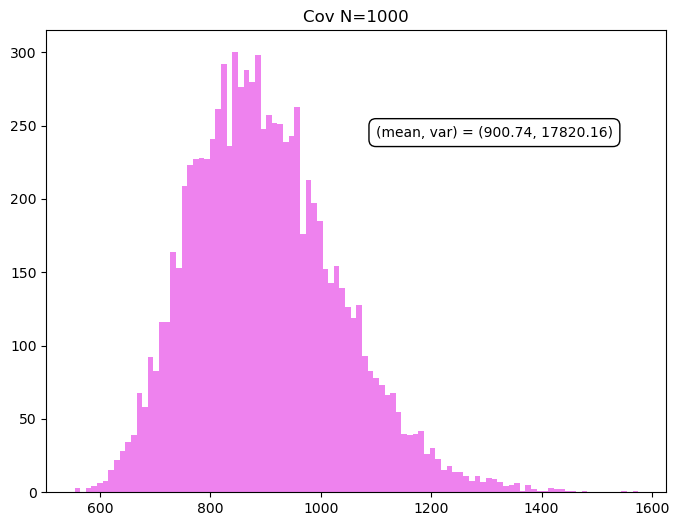

Hartlap factor for n_r=5000: 0.8197639527905581


<Figure size 640x480 with 0 Axes>

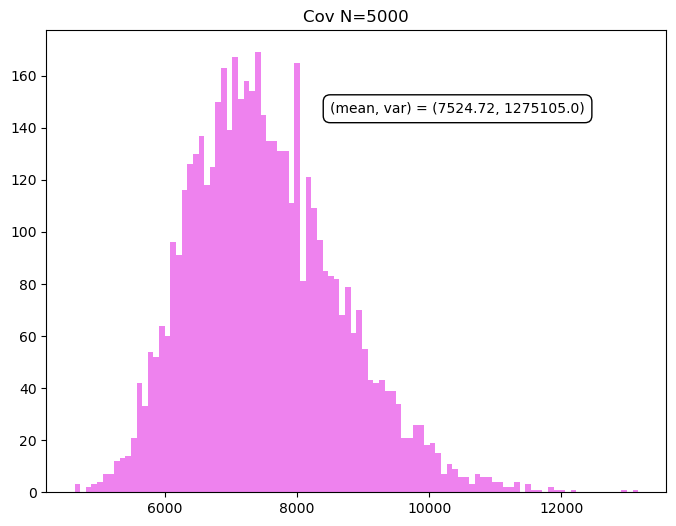

Hartlap factor for n_r=10000: 0.9098909890989099


<Figure size 640x480 with 0 Axes>

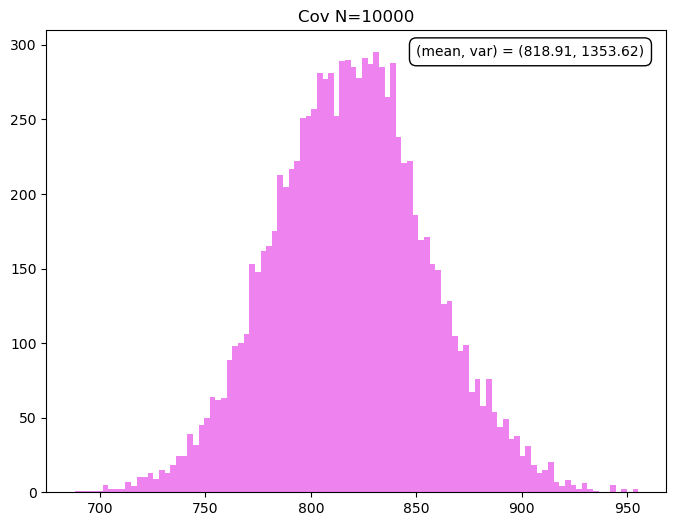

In [33]:
n_r = 500
n_d = 900
h = (n_r-n_d-2)/(n_r-1)
print(f"Hartlap factor for n_r=500: {h}")
inv_cov = inv(cov_num500)*h


plt.figure(0)
plt.figure(figsize=(8, 6))
chi2 = []
for i in range(500,10000):
    chi2.append((model - noisy_data_set2[i, :]) @ inv_cov @ (model - noisy_data_set2[i, :]).T)

plt.hist(chi2, bins=100, color="violet")
plt.title("Cov N=500")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(-3e17, 550, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

n_r = 1000
n_d = 900
h = (n_r-n_d-2)/(n_r-1)
print(f"Hartlap factor for n_r=1000: {h}")
inv_cov = inv(cov_num1000)*h


plt.figure(1)
plt.figure(figsize=(8, 6))
chi2 = []
for i in range(1000,10000):
    chi2.append((model - noisy_data_set2[i, :]) @ inv_cov @ (model - noisy_data_set2[i, :]).T)

plt.hist(chi2, bins=100, color="violet")
plt.title("Cov N=1000")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(1100, 250, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

n_r = 5000
n_d = 900
h = (n_r-n_d-2)/(n_r-1)
print(f"Hartlap factor for n_r=5000: {h}")
inv_cov = inv(cov_num1000)*h


plt.figure(2)
plt.figure(figsize=(8, 6))
chi2 = []
for i in range(5000,10000):
    chi2.append((model - noisy_data_set2[i, :]) @ inv_cov @ (model - noisy_data_set2[i, :]).T)

plt.hist(chi2, bins=100, color="violet")
plt.title("Cov N=5000")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(8500, 150, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

n_r = 10000
n_d = 900
h = (n_r-n_d-2)/(n_r-1)
print(f"Hartlap factor for n_r=10000: {h}")
inv_cov = inv(cov_num10000)*h

plt.figure(3)
plt.figure(figsize=(8, 6))
chi2 = []
for i in range(10000):
    chi2.append((model - noisy_data_set2[i, :]) @ inv_cov @ (model - noisy_data_set2[i, :]).T)

plt.hist(chi2, bins=100, color="violet")
plt.title("Cov N=10000")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(850, 300, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()


### Bonus Task 1: Create a new set of 10000 noisy data vectors using the numerical covariance matrix measured from 1000 noisy data vectors. Is it possible to reduce the noise in the covariance matrix with this method? Test if set 1 follows a $\chi^2$ distribution which the newly created covaraince matrix. What do you observe?

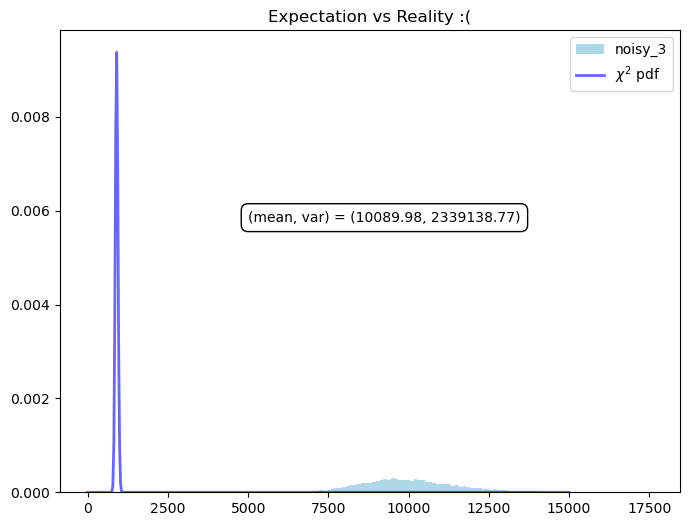

In [37]:
noisy_data_set3=np.random.multivariate_normal(model, cov_num1000, size=10000)
cov_num10000_set3 = np.cov(noisy_data_set3, rowvar=False)

# Test if set 1 follows a chi2 distribution with this new covariance matrix
plt.figure(figsize=(8,6))
inv_cov = inv(cov_num10000_set3)

# Noisy data 1
chi2 = []

for i in range(10000):
    chi2.append((model-noisy_data_set1[i,:])@inv_cov@(model-noisy_data_set1[i,:]).T)

plt.hist(chi2, bins=100, color="lightblue",density=True, label="noisy_3")
x = np.linspace(0, 15000, 500)
plt.plot(x, chi2_scp.pdf(x, 900), lw=2, alpha=0.6, label=r'$\chi^2$ pdf', color="blue")
plt.legend()
plt.title("Expectation vs Reality :(")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(5000, 0.006, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()


Test 3 doesn't follow a $\chi^2$ distribution, it is in fact very off with respect to the theoretical pdf. Using the unreliable covariance matrix created with only 1000 realizations isn't a reliable method, we are creating the data with a covariance that doesn't represent the original dataset. The process isn't correct, I am creating a new dataset with a covariance measured from other data. In fact, even if i use the cov_num10000 matrix (which is much more reliable), the distribution is still quite off (altough much better than this). I will show this in the next cell.

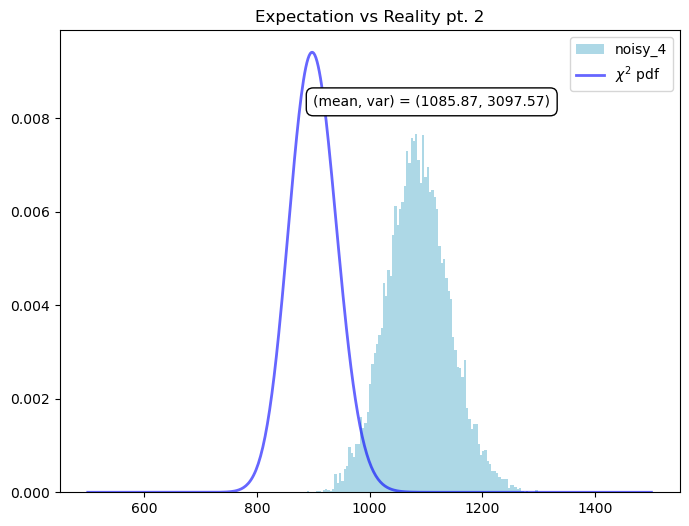

In [44]:
noisy_data_set4=np.random.multivariate_normal(model, cov_num10000, size=10000)
cov_num10000_set4 = np.cov(noisy_data_set4, rowvar=False)

# Test if set 1 follows a chi2 distribution with this new covariance matrix
plt.figure(figsize=(8,6))
inv_cov = inv(cov_num10000_set4)

# Noisy data 1
chi2 = []

for i in range(10000):
    chi2.append((model-noisy_data_set1[i,:])@inv_cov@(model-noisy_data_set1[i,:]).T)

plt.hist(chi2, bins=100, color="lightblue",density=True, label="noisy_4")
x = np.linspace(500, 1500, 500)
plt.plot(x, chi2_scp.pdf(x, 900), lw=2, alpha=0.6, label=r'$\chi^2$ pdf', color="blue")
plt.legend()
plt.title("Expectation vs Reality pt. 2")

mean_chi2 = np.mean(chi2)
var_chi2 = np.var(chi2)
text = "(mean, var) = ({}, {})".format(np.round(mean_chi2,2), np.round(var_chi2,2))
plt.text(900, 0.0085, text, fontsize=10, verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

### Bonus task 2: What is the minimum number of data vectors such that the inverse covariance matrix is non-singular? What is an easy tool to test this? Is an analytical covariance matrix always invertible? What can you do if it is not invertible? 

In [46]:
for i in range(2,10000):

    # Calculate covariance matrix
    cov_matrix = np.cov(noisy_data_set1[:i], rowvar=False)

    # Check if the covariance matrix is invertible
    invertible = np.all(np.linalg.eigvals(cov_matrix) > 0)

    if invertible:
        print(f"Covariance matrix with {i} data vectors is invertible!")
        break

Covariance matrix with 901 data vectors is invertible!


Both the analytical and the sample covariance matrices can be non-invertible. In that case I would remove the negative eigenvalues through a singular value decomposition. 